<a href="https://colab.research.google.com/github/N1khil-J4dhav/College/blob/main/Experiment6_Iris_Dataset_Classification(SVM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Upload CSV
uploaded = files.upload()
df = pd.read_csv(next(iter(uploaded)))

Saving iris_synthetic_data.csv to iris_synthetic_data (1).csv


In [ ]:
# Optional: rename columns for convenience (if needed)
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'label']
print(df.head())
print(df.info())
print(df.describe())

   sepal_length  sepal_width  petal_length  petal_width        label
0           5.2          3.8           1.5          0.3  Iris-setosa
1           5.3          4.1           1.5          0.1  Iris-setosa
2           4.8          3.1           1.5          0.2  Iris-setosa
3           5.2          3.7           1.5          0.2  Iris-setosa
4           4.9          3.0           1.5          0.3  Iris-setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  3000 non-null   float64
 1   sepal_width   3000 non-null   float64
 2   petal_length  3000 non-null   float64
 3   petal_width   3000 non-null   float64
 4   label         3000 non-null   object 
dtypes: float64(4), object(1)
memory usage: 117.3+ KB
None
       sepal_length  sepal_width  petal_length  petal_width
count   3000.000000  3000.000000   3000.000000  3000.000000


In [ ]:
# Features and target
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['label']

In [ ]:
# Encode target labels (if they are strings)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [ ]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Train SVM
model = SVC(kernel='linear')
model.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [ ]:
# Predict & evaluate
y_pred = model.predict(X_test_scaled)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy: 1.0000
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00       217
Iris-versicolor       1.00      1.00      1.00       197
 Iris-virginica       1.00      1.00      1.00       186

       accuracy                           1.00       600
      macro avg       1.00      1.00      1.00       600
   weighted avg       1.00      1.00      1.00       600



Accuracy: 1.0000


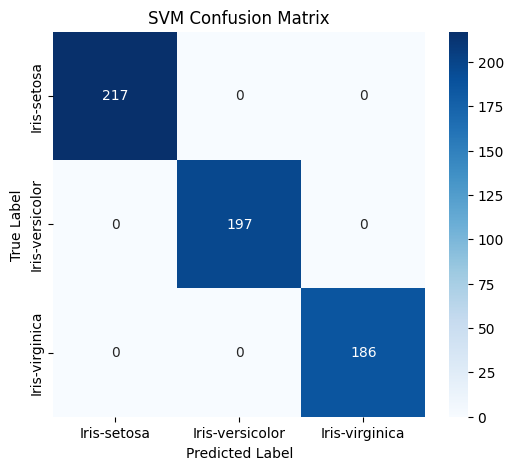

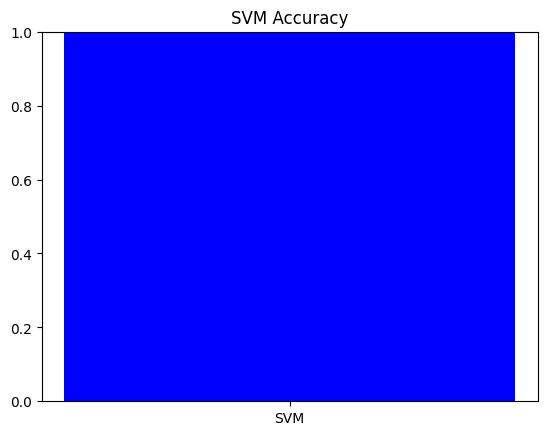

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# After prediction and evaluation:
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")

# Confusion matrix plot
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('SVM Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Bar chart for accuracy
plt.bar(['SVM'], [acc], color='blue')
plt.ylim([0,1])
plt.title('SVM Accuracy')
plt.show()
